In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from device import Device
from loraextensor import LoRaExtensor
from lorawan import LoRaWAN
from loralong import LoRaLong

# Set device consumption characteristics
# https://www.semtech.com/products/wireless-rf/lora-connect/sx1262
sx1262 = Device()
sx1262.SetTxCurrent(118.0)          # 868~915 MHz/+22dBm
sx1262.SetRxCurrent(5.3)            # DCDC Mode/Rx Boosted, LoRa, 125Hz
sx1262.SetIdleCurrent(0.6)          # RC mode/XOSC off
sx1262.SetSleepCurrent(0.0012)      # Sleep with warm start/RC64k
sx1262.SetVoltage(3.3)

generateImages = 0

sf = 7
bw = 500
cr = 1
pkt = 100

In [25]:
simDurationH = 24*365*10
simDuration = simDurationH * 60*60

sf_ex = sf
bw_ex = bw
cr_ex = cr
pkt_ex = pkt
ep_extensor = LoRaExtensor(pkt_ex, sf_ex, bw_ex, cr_ex)

sf_wan = sf
bw_wan = bw
cr_wan = cr
pkt_wan = pkt + 8
ep_lorawan = LoRaWAN(pkt_wan, sf_wan, bw_wan, cr_wan)

sf_lng = sf
bw_lng = bw
cr_lng = cr
pkt_lng = pkt
ep_long = LoRaLong(pkt_lng, sf_lng, bw_lng, cr_lng)

print("loRa Extensor Comparison - endpoint uplink simulation")
print("Device Consumption x Application Uplink Periodicity")
print("Simulation Duration [y]:", simDurationH/(24*365))

ep_extensor_TxTime_array = []
ep_extensor_RxTime_array = []
ep_extensor_SleepTime_array = []
ep_extensor_TxCurr_array = []
ep_extensor_RxCurr_array = []
ep_extensor_SleepCurr_array = []
ep_extensor_TotalMeanCon_array = []

ep_lorawan_TxTime_array = []
ep_lorawan_RxTime_array = []
ep_lorawan_SleepTime_array = []
ep_lorawan_TxCurr_array = []
ep_lorawan_RxCurr_array = []
ep_lorawan_SleepCurr_array = []
ep_lorawan_TotalMeanCon_array = []

ep_long_TxTime_array = []
ep_long_RxTime_array = []
ep_long_SleepTime_array = []
ep_long_TxCurr_array = []
ep_long_RxCurr_array = []
ep_long_SleepCurr_array = []
ep_long_TotalMeanCon_array = []

periodicityS = 86400
periodicityS_array = np.linspace(1, periodicityS, periodicityS-1)
periodicityMin_array = []
periodicityH_array = []
for pS in periodicityS_array:

    periodicityMin_array.append(pS/60)
    periodicityH_array.append(pS/3600)

    txTime, rxTime, idleTime, sleepTime = ep_extensor.SimulateEndpointLoRaExtensor(pS, pkt_ex, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    ep_extensor_TxTime_array.append((txTime/totalTime)*100)
    ep_extensor_RxTime_array.append((rxTime/totalTime)*100)
    ep_extensor_SleepTime_array.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ep_extensor_TxCurr_array.append((tx_mAh/total_mAh)*100)
    ep_extensor_RxCurr_array.append((rx_mAh/total_mAh)*100)
    ep_extensor_SleepCurr_array.append((sleep_mAh/total_mAh)*100)
    ep_extensor_TotalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)

    txTime, rxTime, idleTime, sleepTime = ep_lorawan.SimulateEndpointLoRaWAN(pS, pkt_wan, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    ep_lorawan_TxTime_array.append((txTime/totalTime)*100)
    ep_lorawan_RxTime_array.append((rxTime/totalTime)*100)
    ep_lorawan_SleepTime_array.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ep_lorawan_TxCurr_array.append((tx_mAh/total_mAh)*100)
    ep_lorawan_RxCurr_array.append((rx_mAh/total_mAh)*100)
    ep_lorawan_SleepCurr_array.append((sleep_mAh/total_mAh)*100)
    ep_lorawan_TotalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)

    txTime, rxTime, idleTime, sleepTime = ep_long.SimulateEndpointLoRaLong(pS, pkt_lng, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    ep_long_TxTime_array.append((txTime/totalTime)*100)
    ep_long_RxTime_array.append((rxTime/totalTime)*100)
    ep_long_SleepTime_array.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ep_long_TxCurr_array.append((tx_mAh/total_mAh)*100)
    ep_long_RxCurr_array.append((rx_mAh/total_mAh)*100)
    ep_long_SleepCurr_array.append((sleep_mAh/total_mAh)*100)
    ep_long_TotalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)

loRa Extensor Comparison - endpoint uplink simulation
Device Consumption x Application Uplink Periodicity
Simulation Duration [y]: 10.0


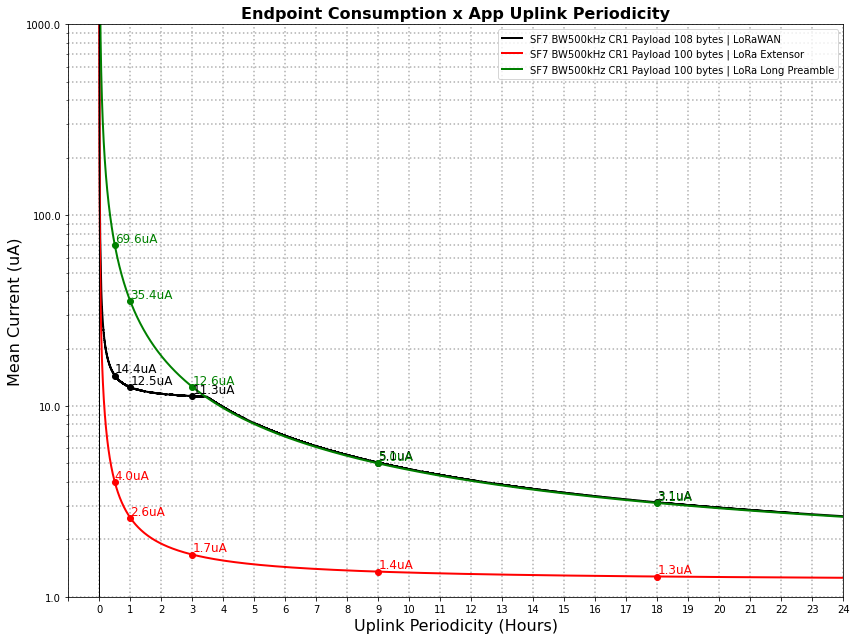

In [26]:
eixo_x = periodicityH_array
eixo_y1 = ep_lorawan_TotalMeanCon_array
eixo_y2 = ep_extensor_TotalMeanCon_array
eixo_y3 = ep_long_TotalMeanCon_array

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'SF{sf_wan} BW{bw_wan}kHz CR{cr_wan} Payload {pkt_wan} bytes | LoRaWAN')
ax.plot(eixo_x, eixo_y2, color='red', linewidth=2, \
        label=f'SF{sf_ex} BW{bw_ex}kHz CR{cr_ex} Payload {pkt_ex} bytes | LoRa Extensor')
ax.plot(eixo_x, eixo_y3, color='green', linewidth=2, \
        label=f'SF{sf_lng} BW{bw_lng}kHz CR{cr_lng} Payload {pkt_lng} bytes | LoRa Long Preamble')
ax.set_title('Endpoint Consumption x App Uplink Periodicity', fontsize=16, weight='bold')
ax.set_xlabel('Uplink Periodicity (Hours)', fontsize=16)
ax.set_ylabel('Mean Current (uA)', fontsize=16)
ax.set_yscale('log')
ax.set_ylim(1, 1000)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [0.5, 1, 3, 9, 18]
for x_m in x_marcar:
    m_y1 = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    m_y2 = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    m_y3 = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, m_y1, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y1, f'{m_y1:.1f}uA', fontsize=12, ha='left', va='bottom', color='black')
    ax.plot(x_m, m_y2, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y2, f'{m_y2:.1f}uA', fontsize=12, ha='left', va='bottom', color='red')
    ax.plot(x_m, m_y3, marker='o', color='green', markersize=6)
    ax.text(x_m, m_y3, f'{m_y3:.1f}uA', fontsize=12, ha='left', va='bottom', color='green')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
if generateImages == 1:
    plt.savefig('loraextensor_ep_meanCurrXappPer.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

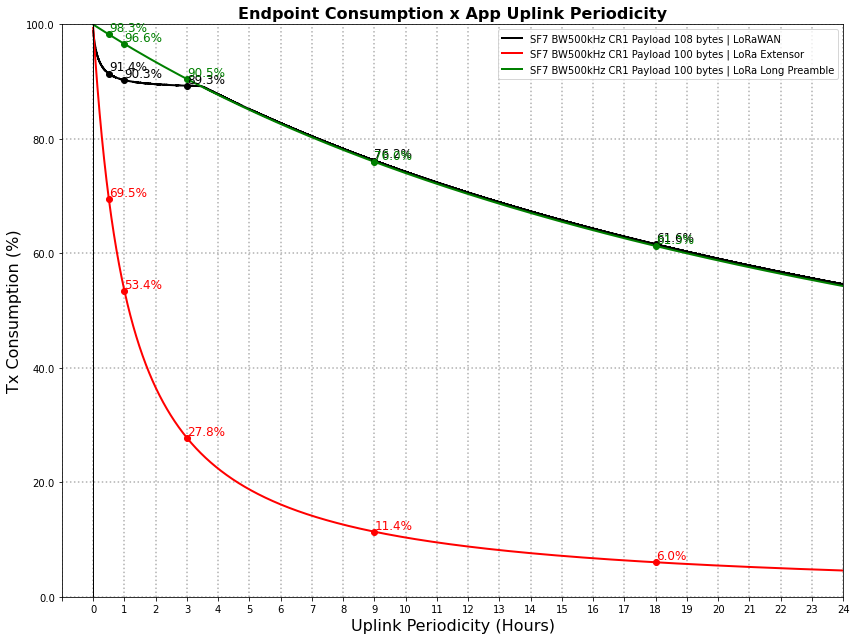

In [27]:
eixo_x = periodicityH_array
eixo_y1 = ep_lorawan_TxCurr_array
eixo_y2 = ep_extensor_TxCurr_array
eixo_y3 = ep_long_TxCurr_array

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'SF{sf_wan} BW{bw_wan}kHz CR{cr_wan} Payload {pkt_wan} bytes | LoRaWAN')
ax.plot(eixo_x, eixo_y2, color='red', linewidth=2, \
        label=f'SF{sf_ex} BW{bw_ex}kHz CR{cr_ex} Payload {pkt_ex} bytes | LoRa Extensor')
ax.plot(eixo_x, eixo_y3, color='green', linewidth=2, \
        label=f'SF{sf_lng} BW{bw_lng}kHz CR{cr_lng} Payload {pkt_lng} bytes | LoRa Long Preamble')
ax.set_title('Endpoint Consumption x App Uplink Periodicity', fontsize=16, weight='bold')
ax.set_xlabel('Uplink Periodicity (Hours)', fontsize=16)
ax.set_ylabel('Tx Consumption (%)', fontsize=16)
ax.set_ylim(0, 100)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [0.5, 1, 3, 9, 18]
for x_m in x_marcar:
    m_y1 = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    m_y2 = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    m_y3 = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, m_y1, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y1, f'{m_y1:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.plot(x_m, m_y2, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y2, f'{m_y2:.1f}%', fontsize=12, ha='left', va='bottom', color='red')
    ax.plot(x_m, m_y3, marker='o', color='green', markersize=6)
    ax.text(x_m, m_y3, f'{m_y3:.1f}%', fontsize=12, ha='left', va='bottom', color='green')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
if generateImages == 1:
    plt.savefig('loraextensor_ep_meanCurrXappPer.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

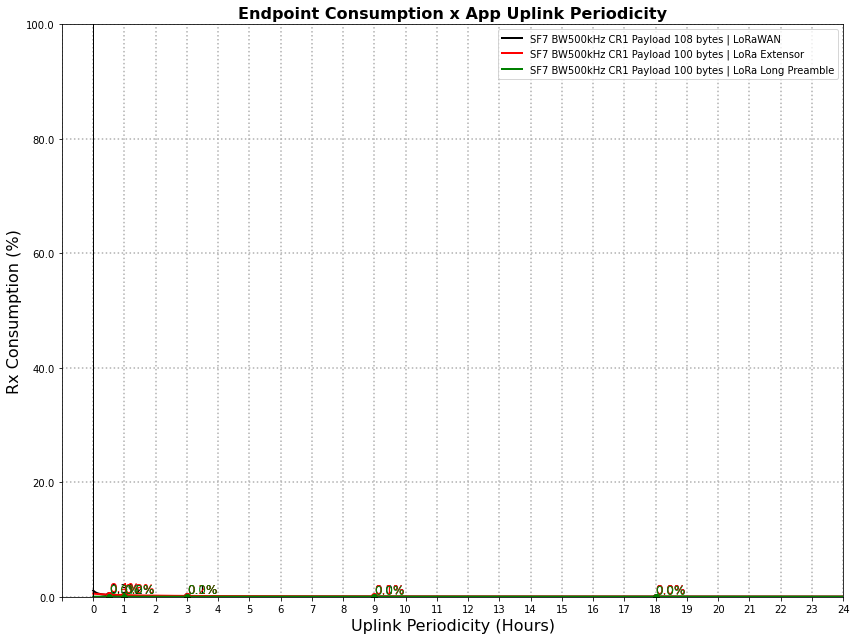

In [28]:
eixo_x = periodicityH_array
eixo_y1 = ep_lorawan_RxCurr_array
eixo_y2 = ep_extensor_RxCurr_array
eixo_y3 = ep_long_RxCurr_array

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'SF{sf_wan} BW{bw_wan}kHz CR{cr_wan} Payload {pkt_wan} bytes | LoRaWAN')
ax.plot(eixo_x, eixo_y2, color='red', linewidth=2, \
        label=f'SF{sf_ex} BW{bw_ex}kHz CR{cr_ex} Payload {pkt_ex} bytes | LoRa Extensor')
ax.plot(eixo_x, eixo_y3, color='green', linewidth=2, \
        label=f'SF{sf_lng} BW{bw_lng}kHz CR{cr_lng} Payload {pkt_lng} bytes | LoRa Long Preamble')
ax.set_title('Endpoint Consumption x App Uplink Periodicity', fontsize=16, weight='bold')
ax.set_xlabel('Uplink Periodicity (Hours)', fontsize=16)
ax.set_ylabel('Rx Consumption (%)', fontsize=16)
ax.set_ylim(0, 100)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [0.5, 1, 3, 9, 18]
for x_m in x_marcar:
    m_y1 = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    m_y2 = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    m_y3 = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, m_y1, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y1, f'{m_y1:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.plot(x_m, m_y2, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y2, f'{m_y2:.1f}%', fontsize=12, ha='left', va='bottom', color='red')
    ax.plot(x_m, m_y3, marker='o', color='green', markersize=6)
    ax.text(x_m, m_y3, f'{m_y3:.1f}%', fontsize=12, ha='left', va='bottom', color='green')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
if generateImages == 1:
    plt.savefig('loraextensor_ep_meanCurrXappPer.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

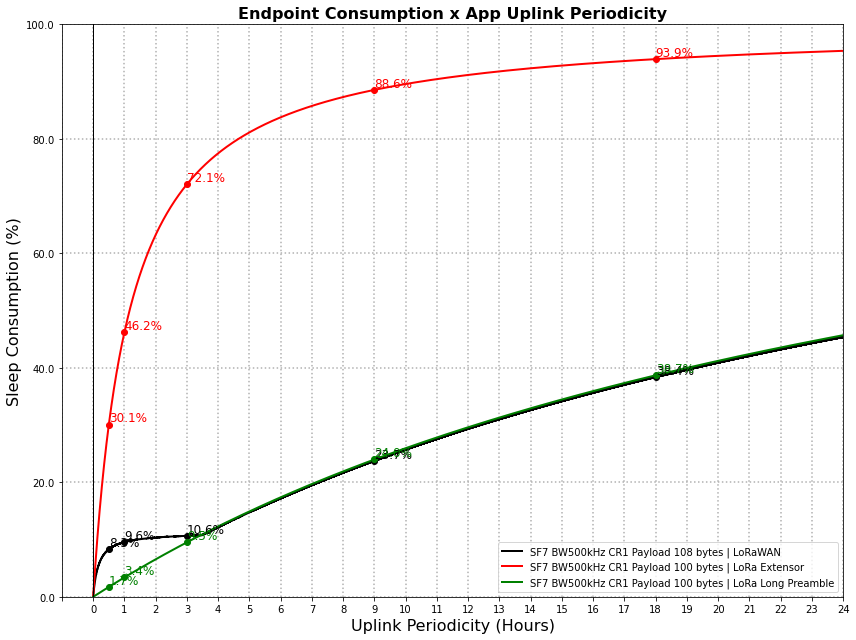

In [29]:
eixo_x = periodicityH_array
eixo_y1 = ep_lorawan_SleepCurr_array
eixo_y2 = ep_extensor_SleepCurr_array
eixo_y3 = ep_long_SleepCurr_array

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'SF{sf_wan} BW{bw_wan}kHz CR{cr_wan} Payload {pkt_wan} bytes | LoRaWAN')
ax.plot(eixo_x, eixo_y2, color='red', linewidth=2, \
        label=f'SF{sf_ex} BW{bw_ex}kHz CR{cr_ex} Payload {pkt_ex} bytes | LoRa Extensor')
ax.plot(eixo_x, eixo_y3, color='green', linewidth=2, \
        label=f'SF{sf_lng} BW{bw_lng}kHz CR{cr_lng} Payload {pkt_lng} bytes | LoRa Long Preamble')
ax.set_title('Endpoint Consumption x App Uplink Periodicity', fontsize=16, weight='bold')
ax.set_xlabel('Uplink Periodicity (Hours)', fontsize=16)
ax.set_ylabel('Sleep Consumption (%)', fontsize=16)
ax.set_ylim(0, 100)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [0.5, 1, 3, 9, 18]
for x_m in x_marcar:
    m_y1 = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    m_y2 = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    m_y3 = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, m_y1, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y1, f'{m_y1:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.plot(x_m, m_y2, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y2, f'{m_y2:.1f}%', fontsize=12, ha='left', va='bottom', color='red')
    ax.plot(x_m, m_y3, marker='o', color='green', markersize=6)
    ax.text(x_m, m_y3, f'{m_y3:.1f}%', fontsize=12, ha='left', va='bottom', color='green')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
if generateImages == 1:
    plt.savefig('loraextensor_ep_meanCurrXappPer.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()